# Predicting Star NBA Players

Author: Alejandro Salmeron

Course Project, UC Irvine, Math 10, S23

## Introduction


NBA fans measure players nowadays based on their statistics, rather than style of play, grabbing every 3 point, assists, rebound, etc. into all debates when deciding who is the best player. Therefore, I will see the statistics that players are most likely to be output based on two statistical inputs (Rebounds and Assists, Points and 3FG%, etc.). I selected 2 players from whom I believe are the best in the NBA for every of the 5 positions (Excluding Nikola Jokic because he is extremely dominante in every category). I will find which pair of statistics most accurately predicts a player and create visuals based upon that pair. 

## NBA Statistics this Season


In [1]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 KB 20.5 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


I imported an excel file I made, where I inputed the data myself, because there did not exsist a dataset for the players and statistics which I needed. I manually pasted the per season statistcs of each player from a CBS Sports record for each player. 
To begin with, I first import the file, delete uneccessary columns, and drop rows without values.

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import altair as alt
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
df = pd.read_excel("NBAStats.xlsx")
df.drop('Unnamed: 12', inplace=True, axis=1)
df.drop('Unnamed: 13', inplace=True, axis=1)
df.drop('Unnamed: 14', inplace=True, axis=1)
df.dropna(inplace=True)


I will be comparing the 10 players below.
I also added a column which contains the position of the player

In [3]:
dic_pos={"Stephen Curry": "PG", "Trae Young":"PG", "James Harden":"SG","Devin Booker":"SG","Lebron James": "SF","Kevin Durant":"SF",
"Giannis Antetokoumpo": "PF", "Jason Tatum":"PF", "Joel Embiid": "C", "Domantas Sabonis": "C"}
df["Position"]=" "
for i in range (0,len(df)):
    df.loc[i,"Position"]=dic_pos[df.loc[i,"Name"]]



Creating a column with the match result

In [4]:
df["IsWin"]=df["Result"].str.startswith("W")
df.replace({False: 0, True: 1}, inplace=True)


Changing all the values that are objects to floats if possible

In [5]:
float_cols=["Points","Rebounds","Assists","Steals","Blocks","FG%","3FG%"]
df[float_cols]=df[float_cols].astype(float)
df.head()

Name       Date Opponent     Result Minutes  Points  Rebounds  \
0  Stephen Curry 2023-04-09    @POR   W 157-101     22     26.0       5.0   
1  Stephen Curry 2023-04-07    @SAC    W 119-97     33     25.0       7.0   
2  Stephen Curry 2023-04-04  vs OKC   W 136-125     37     34.0       5.0   
3  Stephen Curry 2023-04-02    @DEN   L 112-110     37     21.0       3.0   
4  Stephen Curry 2023-03-31   vs SA   W 130-115     33     33.0       2.0   

   Assists  Steals  Blocks   FG%  3FG% Position  IsWin  
0      7.0     0.0     0.0  60.0  50.0       PG      1  
1      6.0     2.0     1.0  57.1  42.9       PG      1  
2      6.0     1.0     0.0  44.0  46.2       PG      1  
3      4.0     0.0     2.0  28.6  14.3       PG      0  
4      5.0     0.0     0.0  52.4  63.6       PG      1

Since we are measuring the ten players with 7 different features and I would like to visualize the data in a 2-D graph, I found the two features which the model can use to most accurately predict the player. (Which pair returns the highest value for clf.score)

In [6]:
from itertools import product
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=10000)
MinVal=1
MaxVal=0
Lists=list(product(float_cols,float_cols))
for i in range(len(Lists)):
    if Lists[i][0]!=Lists[i][1]:
        cols=[Lists[i][0],Lists[i][1]]
        clf.fit(df[cols],df["Name"])
        score=clf.score(df[cols],df["Name"])
        if MaxVal<score:
            MaxVal=score
            Metrics_2=cols
        if MinVal>score:
            MinVal=score
            Pair2=cols
print("The highest accuracy is", round(MaxVal,4)," with the inputs being: ",Metrics_2 )
print("The lowest accuracy is", round(MinVal,4)," with the inputs being: ",Pair2 )  
    

The highest accuracy is 0.3326  with the inputs being:  ['Rebounds', 'Assists']
The lowest accuracy is 0.1539  with the inputs being:  ['Steals', '3FG%']


So we will use rebounds and assists as input features because they are the features that the model can use to most accurately predict who the player is, with 33% accruacy.
## Non-Linear Decision Boundary Chart
Below is a Non-Linear Decision Boundary Chart that helps show who the model predicts a player will be based on the two inputs.

In [7]:
clf.fit(df[Metrics_2],df["Name"])
alt.data_transformers.enable('default', max_rows=1000000)
x = np.linspace(0, 20, 100)
y = np.linspace(0,20, 100)
df_art = pd.DataFrame(list(product(x,y)))
df_art.columns=Metrics_2
df_art["pred"] = clf.predict(df_art[Metrics_2])
Decision_Boundary_Chart=alt.Chart(df_art,title="Non-Linear Decision Boundary Chart").mark_circle(size=30).encode(
    x=alt.X(Metrics_2[0], scale=alt.Scale(zero=False)),
    y=alt.Y(Metrics_2[1], scale=alt.Scale(zero=False)),
    color=alt.Color("pred", scale=alt.Scale(scheme="category10")),
    tooltip=[Metrics_2[0],Metrics_2[1], "pred"])
Decision_Boundary_Chart


alt.Chart(...)

Looking at indivudal players, we examine  Giannis Antetokoumpo as an example. I analyed blocks and assists, and how much they affected whether or not he won the game. 

In [8]:
df["IsWin"]=df["Result"].str.startswith("W")
#df.replace({False: 0, True: 1}, inplace=True)
df_player=df[df["Name"]=="Giannis Antetokoumpo"]
Metrics_Player=["FG%","Assists"]
clf2=LogisticRegression(max_iter=10000)
clf2.fit(df_player[Metrics_Player],df_player["IsWin"])

print("The accuracy of our prediction as to whether or not he wins or loses is",
clf2.score(df_player[Metrics_Player],df_player["IsWin"]) ," with the inputs being: ",Metrics_Player )


print("The coefficients are:",clf2.coef_)

The accuracy of our prediction as to whether or not he wins or loses is 0.75  with the inputs being:  ['FG%', 'Assists']
The coefficients are: [[0.0693718  0.29381611]]


This means that the the amount of assists he gets significantly affects whether or not he wins the match (coefficient of .2938), with the FG% (coefficient of .0694) not being the biggest contributor

In [9]:
alt.data_transformers.enable('default', max_rows=1000000)
x = np.linspace(0, 100, 100)
y = np.linspace(0,16, 100)
df_art = pd.DataFrame(list(product(x,y)))
df_art.columns=Metrics_Player
df_art["pred"] = clf2.predict(df_art[Metrics_Player])
Decision_Boundary_Chart_Giannis=alt.Chart(df_art,title="Decision Boundary Chart--Giannis Wins?").mark_circle(size=30).encode(
    x=alt.X(Metrics_Player[0], scale=alt.Scale(zero=False)),
    y=alt.Y(Metrics_Player[1], scale=alt.Scale(zero=False)),
    color="pred",
    tooltip=[Metrics_Player[0],Metrics_Player[1], "pred"])
Decision_Boundary_Chart_Giannis


alt.Chart(...)

We can see that when giannis gets either more than 14 assists, or avarages more than 62% from the field, the chances of him winning go up to 75%.

## Decision Tree Classifier
Now I will use a decision tree classifier to find out what is the ideal amount of leaf nodes neccessary for
fitting the data. This will use the test error vs training error model.

In [10]:
from pandas.api.types import is_numeric_dtype
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

features = [column for column in df.columns if is_numeric_dtype(df[column]) and column!="IsWin"]
X_train, X_test, y_train, y_test = train_test_split(
                                        df[features],
                                        df["Name"], 
                                        train_size=0.9,
                                        random_state=0
                                    )

In [11]:
df_errTrain=pd.DataFrame(columns=["leaves", "error", "set"])
for i in range(2,60):
    DTF1 = DecisionTreeClassifier(max_leaf_nodes=i)
    DTF1.fit(X_train, y_train)
    score=1-DTF1.score(X_train, y_train)
    dic={"leaves":i, "error":score, "set":"train"}
    df_errTrain.loc[len(df_errTrain)] = dic
df_errTest=pd.DataFrame(columns=["leaves", "error", "set"])
for i in range(2,60):
    DTF2 = DecisionTreeClassifier(max_leaf_nodes=i)
    DTF2.fit(X_train, y_train)
    score=1-DTF2.score(X_test, y_test)
    dic={"leaves":i, "error":score, "set":"test"}
    
    df_errTest.loc[len(df_errTest)] = dic
import altair as alt
c1=alt.Chart(df_errTrain).mark_line(size=5).encode(
    x="leaves",
    y="error",
    color="set",
    tooltip=["leaves","error"])
c2=alt.Chart(df_errTest).mark_line(size=5).encode(
    x="leaves",
    y="error",
    color="set",
    tooltip=["leaves","error"])
c1+c2


alt.LayerChart(...)

In [12]:
DTC = DecisionTreeClassifier(max_leaf_nodes=14)
DTC.fit(X_train, y_train)
print(DTC.score(X_train, y_train))
DTC.score(X_test, y_test)

0.4006878761822872


0.34615384615384615

6-15 Leaf Nodes seems to be the sweet spot between the training and test set. We have 40% accuracy on the training set and 34% accurate on the test set. We will go with 14 leaf nodes so we can assure that almost all players are shown in our decision tree graph below. The data will not be two rigid, but will also not suggest overfitting, making it the perfect measurement.

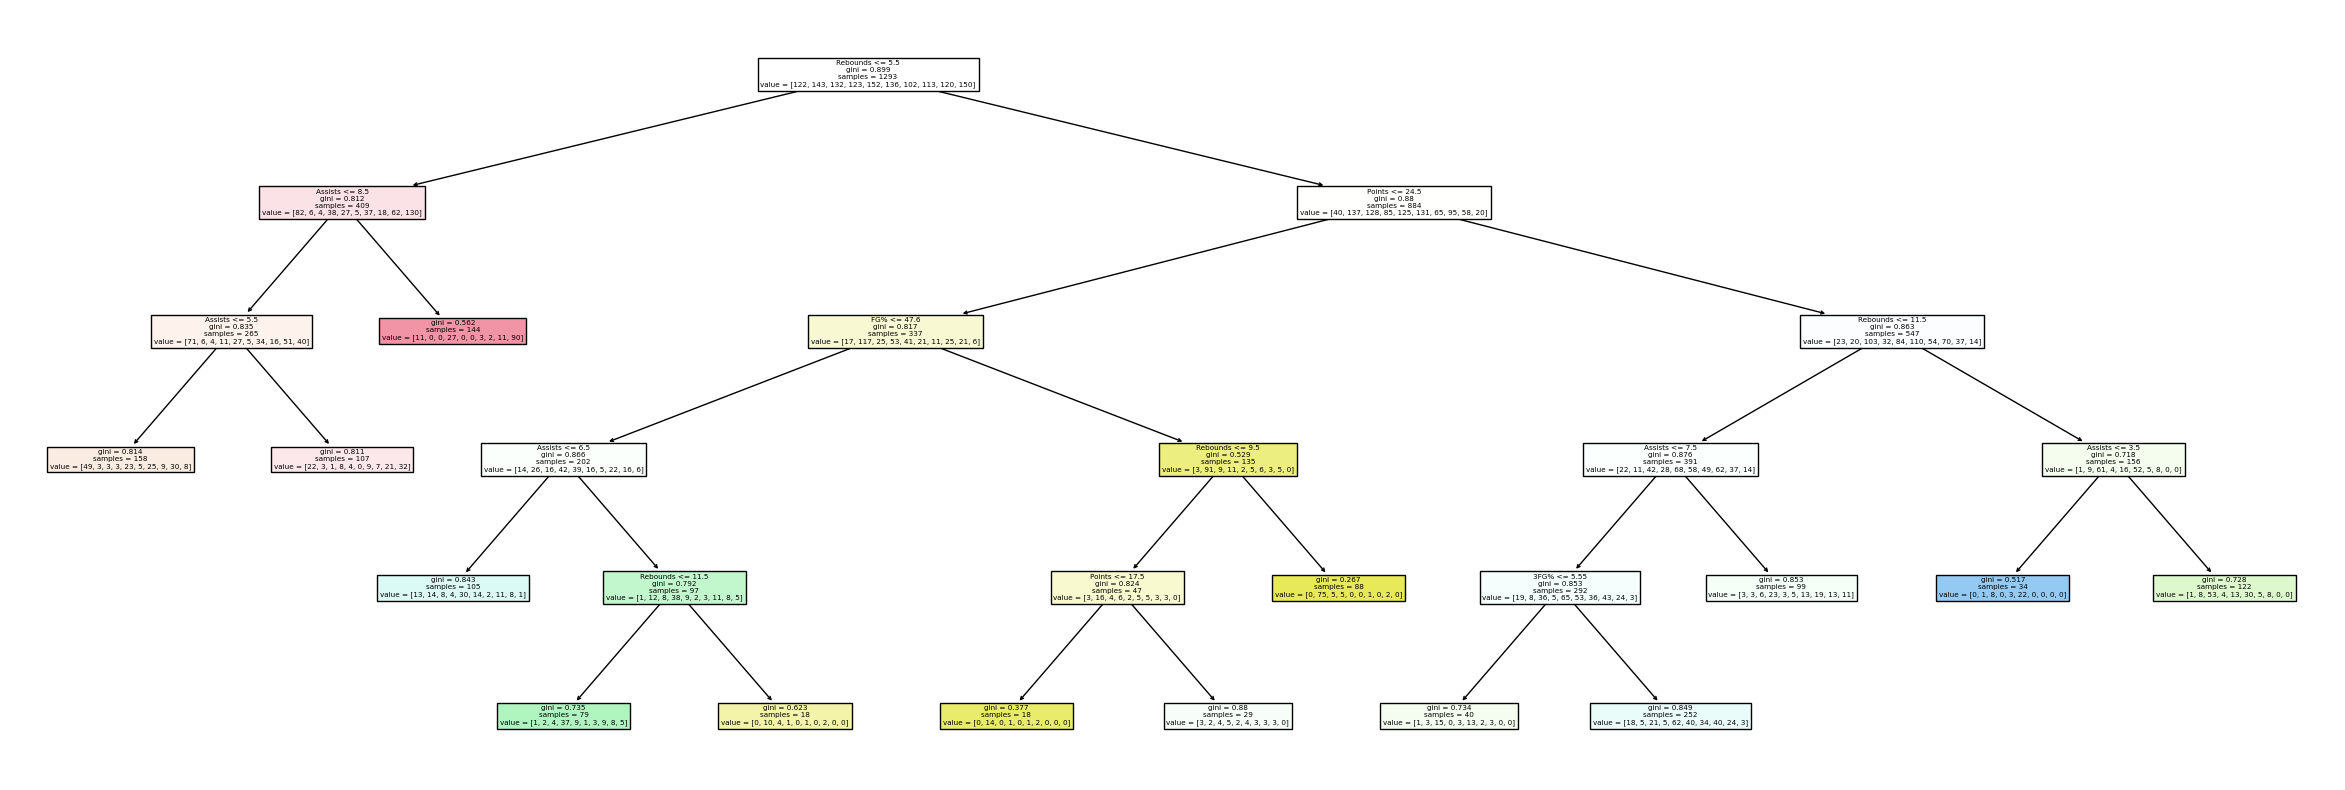

In [13]:
DTC = DecisionTreeClassifier(max_leaf_nodes=14)
DTC.fit(df[features], df["Name"])
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(30,10))
_ = plot_tree(DTC, feature_names=DTC.feature_names_in_, filled=True)

In [14]:
dtc = DecisionTreeClassifier(max_leaf_nodes=14)
dtc.fit(df[Metrics_2],df["Name"])
rng = np.random.default_rng()
arr = rng.random(size=(7000, 2))
df_art2 = pd.DataFrame(arr, columns=Metrics_2)
df_art2["Rebounds"] *= 40
df_art2["Assists"] *=18
df_art2["pred"] = dtc.predict(df_art2[Metrics_2])


In [15]:
Leaf_Node_Chart=alt.Chart(df_art2,title="Linear Decision Tree Boundaries Chart").mark_circle(size=50).encode(
    x="Rebounds",
    y="Assists",
    color=alt.Color("pred", scale=alt.Scale(scheme="category10")),
    tooltip=["Rebounds", "Assists"]
)

In [16]:
Actual_Values_Chart=alt.Chart(df, title="Actual Values Chart").mark_circle(size=100).encode(
    x="Rebounds",
    y="Assists",
    color=alt.Color("Name", scale=alt.Scale(scheme="category10")),
    tooltip=["Rebounds", "Assists","Name"]
)

In [17]:
Leaf_Node_Chart|Decision_Boundary_Chart|Actual_Values_Chart

alt.HConcatChart(...)

Above we can compare the actual values chart with the linear and non-linear decision boundary chart.

## Principal Component Analysis
Using help from Builtin.com, which gave me a tutorial as to how to use PCA, I will use principal componenet analysis to analyze the data. It takes the 7 input features and groups them into two groups, so we can visualize it in a graph. It groups the input features based on importance towards how much an input affects the output using a series of vectors. For more imformation on how PCA works, watch https://youtu.be/kApPBm1YsqU.  First we must standardized the data, because if not, then it is not accurate as different inputs have different ranges of values.

In [18]:
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None 
List=["Trae Young","James Harden","Lebron James","Jason Tatum","Domantas Sabonis",]
arr = np.array(List)
df_sub=df[df["Name"].isin(arr)]
numbers=list(range(0,len(df_sub)))
df_sub["numbers"]=numbers
x=df_sub.loc[:,features].values
y=df_sub.loc[:,"Name"].values
x=StandardScaler().fit_transform(x)
df_sub.set_index("numbers", inplace=True)

Now we instantiate PCA and fit the data two the two components, PCA 1 and PCA 2. Above we used 1 player from each position to get more clear results. 

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principal_components=pca.fit_transform(x)
principaldf=pd.DataFrame(data=principal_components, columns=['principal component 1','principal component 2'])
principaldf["target"]=df_sub["Name"]
principaldf["position"]=df_sub["Position"]
principaldf

principal component 1  principal component 2            target position
0                 1.543407              -2.562823        Trae Young       PG
1                 1.184469              -2.304904        Trae Young       PG
2                 1.859015              -1.243542        Trae Young       PG
3                 2.641699              -0.578754        Trae Young       PG
4                 1.202767              -2.016878        Trae Young       PG
..                     ...                    ...               ...      ...
676               0.315351               1.877651  Domantas Sabonis        C
677               0.146548               1.366247  Domantas Sabonis        C
678               1.315093               1.434534  Domantas Sabonis        C
679              -1.970329               0.350829  Domantas Sabonis        C
680              -2.608780               0.925322  Domantas Sabonis        C

[681 rows x 4 columns]

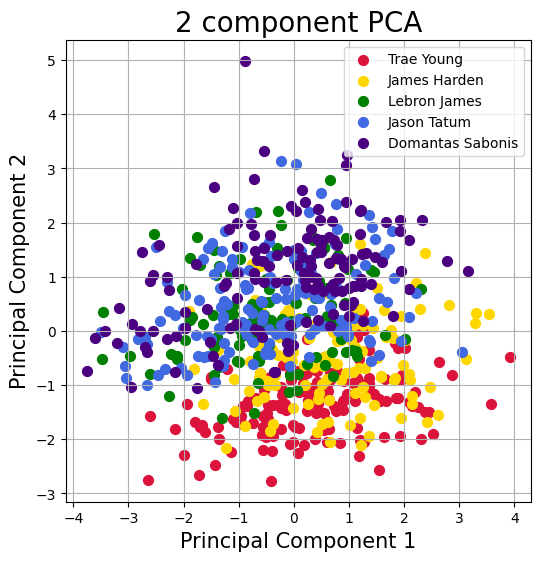

In [20]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = list(List)
#colors = ['crimson','orangered','yellow','gold','lime','green','royalblue','teal','indigo','darkviolet']
colors = ['crimson','gold','green','royalblue','indigo']
for target, color in zip(targets,colors):
    indicesToKeep = principaldf['target'] == target
    ax.scatter(principaldf.loc[indicesToKeep, 'principal component 1']
               , principaldf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

As we can see the two gaurds, Harden and Trae Young have very similair spreads, whilst the forwards and center (Lebron, Tatum, and Sabonis) have similar spreads. This shows the difference in output every game based on the position they play. 

In [21]:
print("The variance for each feature is",pca.explained_variance_ratio_)
pd.DataFrame(pca.components_,columns=features,index = ['PC-1','PC-2'])

The variance for each feature is [0.24919576 0.19837609]


Points  Rebounds   Assists    Steals    Blocks       FG%      3FG%
PC-1 -0.555938 -0.122745  0.232897  0.124157 -0.121489 -0.580491 -0.504462
PC-2 -0.190797  0.610024 -0.503959  0.013517  0.467839  0.052144 -0.340174

The sum of the first two components is 45%. So since we haven't met 85% of the variance (data) with our first two components, it is fair to assume that this is not the best way to view the represent the data because we lose variance. We can also see the coefficients of the linear equation for both principal components, and see how large (closer to -1 or 1) versus how small (closer to 0) each feature weighs in determining the values for each principal component

## Summary

In this project, we analyzed the data using Logistic Regression to see if it was possible to predict a player based on 2 features of their performance every game. We determined rebounds and assists have the greatest accuracy to determine who a player is. Then we looked at Giannis Antetokoumpo and looked at two inputs (FG% and Assists) and saw that both can increase the chances of predicting whether or not he wins or loses up to 75%. The decision tree classifier of 14 leaf nodes helped make a linear decision tree boundary graph and we put it side by side to the non-linear decision tree graph and the actual values graph to see the comparisons. 
Using PCA we were able to group the inputs together and saw the importance of each input as well as a graph that showed the difference in output for different styles of play based on position. 
Overall, we saw that the statistics (Rebounds, Points, Assists, Steals, Blocks, 3FG%, FG%) don't have the greatest impact towards predicting who the player is. There is a correlation but it is not the strongest or most accurate. This is probably because many players avarage similair stats regardless of their playstyle or position. They achieve similar stats in different ways: Curry with 3s, Giannis with Layups etc. Also, having 10 variables for the prediction makes it even harder to accurately predict the player. 

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)? I manually created the data on excel using tables from CBS Sports Records. 

I used the class knowledge for the main part of the project and then for the principal component anlysis part I used Builtin.com to learn how to use PCA.
1) https://builtin.com/data-science/step-step-explanation-principal-component-analysis
2) https://vega.github.io/vega/docs/schemes/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=21c6718a-e28c-4e51-94a0-e33b9a4d9022' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>